In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
#loading the dataset
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [3]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
#image normalization
X_train=X_train/255.0
X_test=X_test/255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

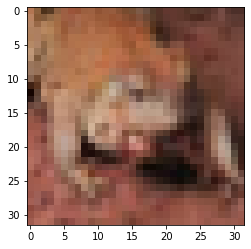

In [8]:
plt.imshow(X_test[5])

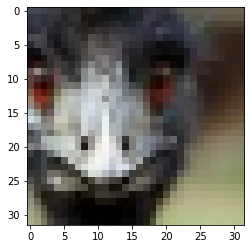

In [9]:
plt.imshow(X_test[35])

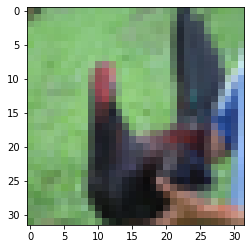

In [10]:
plt.imshow(X_test[25])

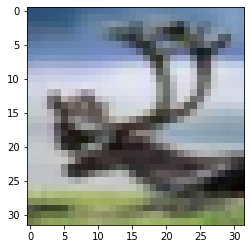

In [11]:
plt.imshow(X_test[40])

In [12]:
#model building

In [13]:
#defining the model
model=tf.keras.models.Sequential()

In [14]:
#adding the first CNN Layer

#filter : 32
#kernel size : 3*3
#padding : same(zero padding)
#activation : Relu
#input shape : (32,32,3)

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation='relu',input_shape=[32,32,3]))

In [15]:
#adding the second CNN Layer and 1st max pooling layer

#CNN Layer
#filter : 32
#kernel_size : 3*3
#padding : same
#activation : relu

#Max Pooling Layer
#pool_size : 2
#strides : 2
#padding : valid(ones padding)

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [16]:
#adding the third CNN layer

#filter : 64
#kernel size : 3*3
#padding : same(zero padding)
#activation : Relu
#input shape : (32,32,3)

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation='relu',input_shape=[32,32,3]))


In [17]:
#adding the fourth CNN Layer and 2nd max pooling layer

#CNN Layer
#filter : 64
#kernel_size : 3*3
#padding : same
#activation : relu

#Max Pooling Layer
#pool_size : 2
#strides : 2
#padding : valid(ones padding)

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [18]:
#adding the flatten layer

model.add(tf.keras.layers.Flatten())

In [19]:
#adding the first dense layer

#units/neurons : 128
#activation : relu

model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [20]:
#adding the second dense layers(output layer)

#units : 10 (same as the number of classes)
#activation : softmax

model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='AdaGrad',metrics=['sparse_categorical_accuracy'])

In [26]:
#training the model
model.fit(X_train,y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 265s 170ms/step - loss: 2.0877 - sparse_categorical_accuracy: 0.2381
Epoch 2/3
1563/1563 [==============================] - 266s 170ms/step - loss: 1.8708 - sparse_categorical_accuracy: 0.3365
Epoch 3/3
1563/1563 [==============================] - 265s 170ms/step - loss: 1.7619 - sparse_categorical_accuracy: 0.3776


In [27]:
#model evaluation
test_loss, test_accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 14s 44ms/step - loss: 1.7098 - sparse_categorical_accuracy: 0.4003
